In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
%config InlineBackend.figure_format = 'retina'

# Part 1

**(1)**

In [2]:
image = io.imread('lab12_image_processing/head_by_Ron_Mueck.jpg')

In [3]:
from skimage.filters.rank import entropy 
from skimage.morphology import disk 
from skimage.color import rgb2gray 

C:\Users\thepi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


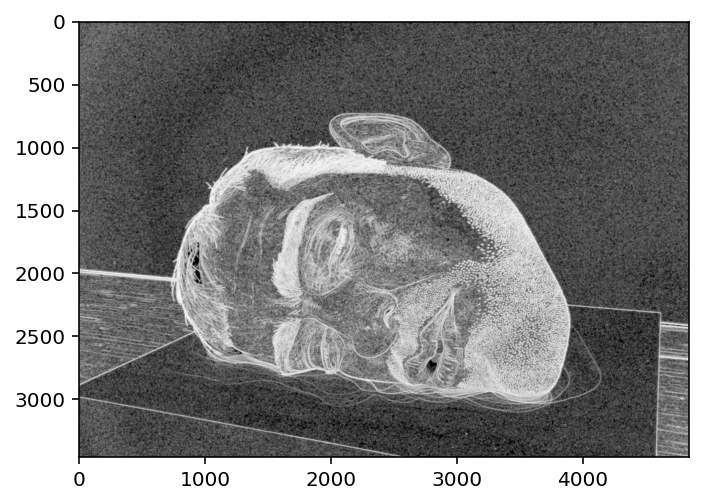

In [4]:
gray_image = rgb2gray(image) 
entropy_image = entropy(gray_image, disk(5))

plt.imshow(entropy_image,cmap='gray')

**(2)**

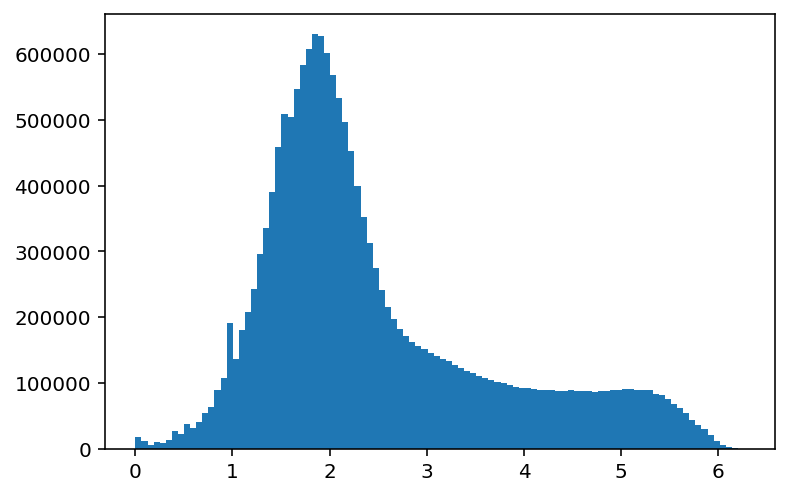

In [5]:
plt.hist(entropy_image.ravel(),100)
plt.show()

In [6]:
val = 5
image_bw1 = (entropy_image >  val) 
#image_bw2 = (entropy_image <= val)

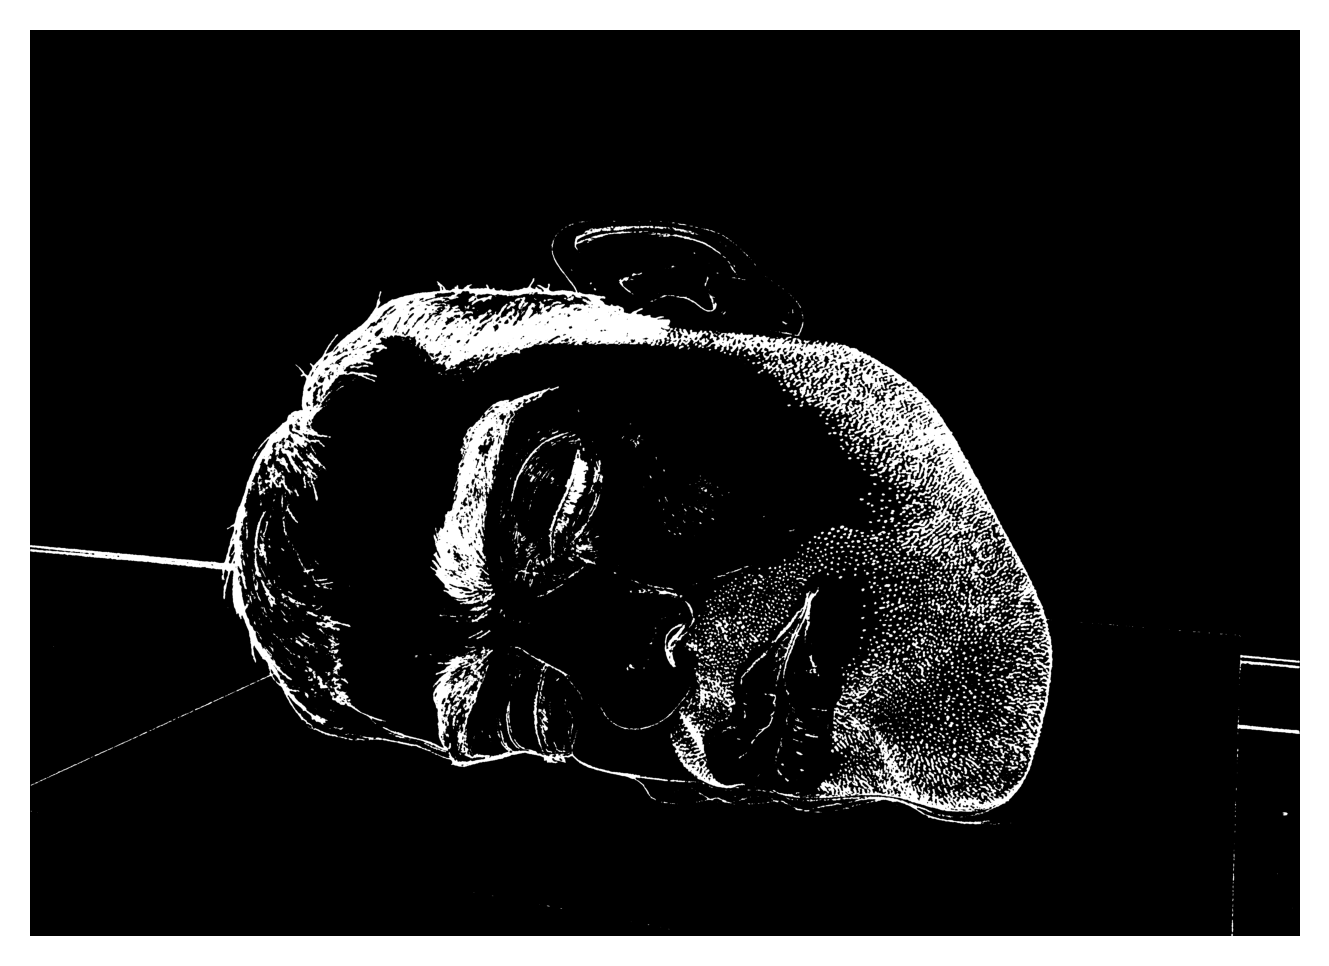

In [7]:
plt.figure(dpi=150)
plt.imshow(image_bw1,cmap='gray')
plt.axis('off')
plt.show()

**(3)**

In [8]:
print(entropy_image.max(),entropy_image.min())

6.265775928810541 0.0


In [9]:
mx = entropy_image.max()
dx = mx/100
hair_dx = (1+6-mx)/dx
pixels = hair_dx*100000
pixels

1171800.714758148

In [10]:
pixx,pixy = entropy_image.shape

A = pixx*pixy
non_hair = A - pixels

frac = pixels/non_hair
percent= frac*100
percent

7.528140041597747

approximately 7.53% of the pixels in the image show hair and beard

**(4)**

Error in the estimation of the beard/hair is due to the fact that the method is imperfect. The disk size being small enough to isolate the beard leads to inclusion of small aberrations of entropy in the image. To completely exclude these aberrations, the disk size would be too large to include every pixel of hair.

Additionally, not all of the hair is entropic, it is obvious that a large portion of the hair above the forehead is not being included

# Part 2

**(1)**

In [43]:
image = io.imread('lab12_image_processing/3.jpg')

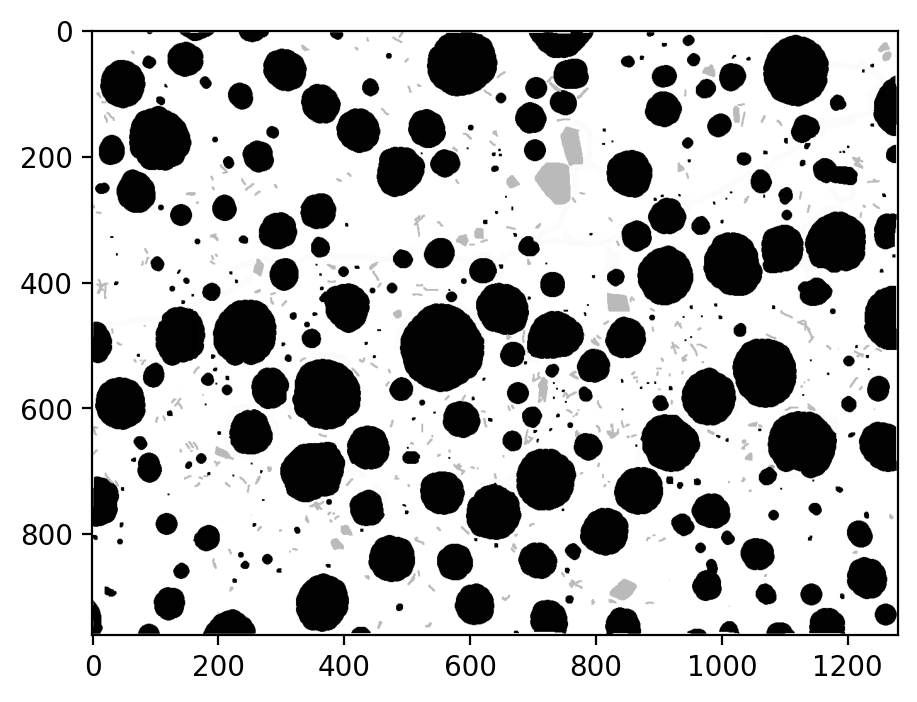

In [44]:
plt.figure(dpi=100)
plt.imshow(image,cmap='gray')
plt.show()

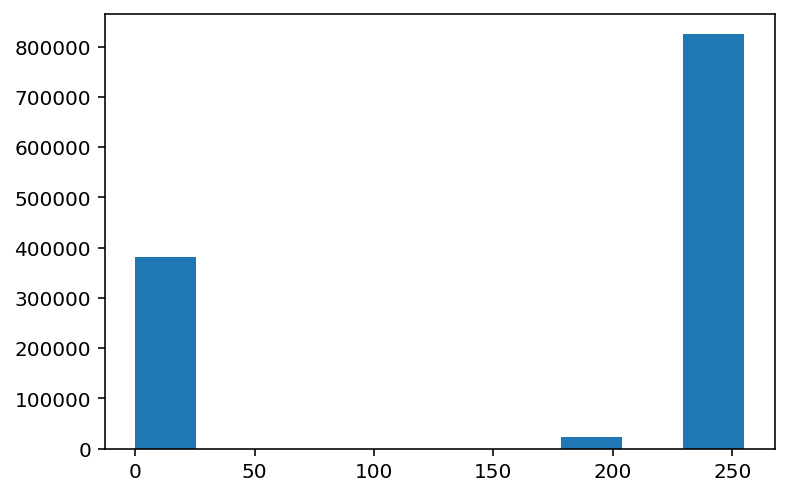

In [46]:
plt.hist(image.ravel(),10)
plt.show()

**(2)**

In [87]:
val = 150
image_bubbles = (image<val)

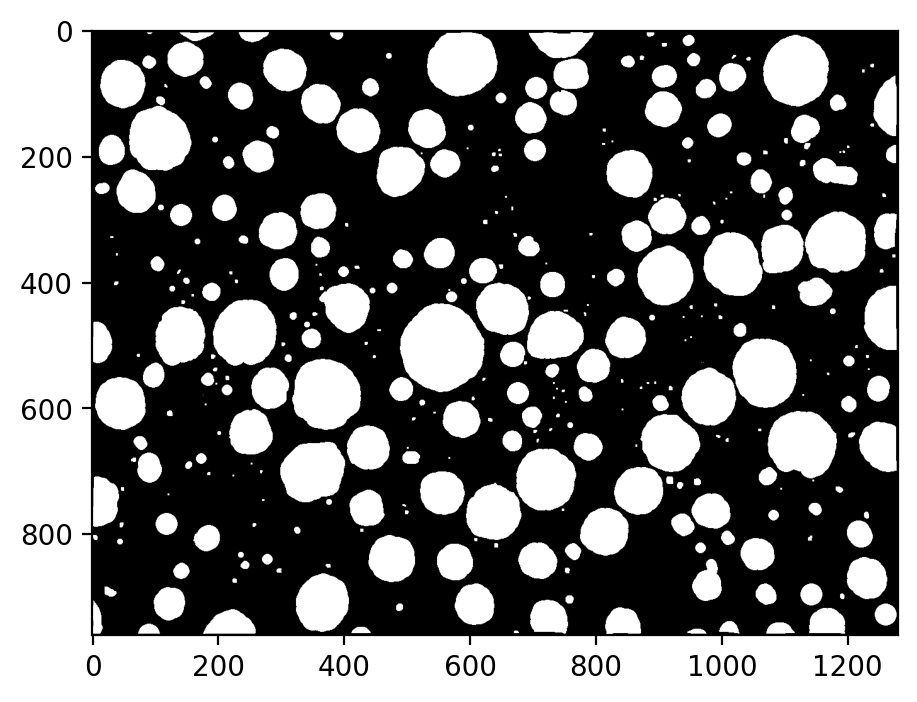

In [88]:
plt.figure(dpi=100)
plt.imshow(image_bubbles,cmap='gray')
plt.show()

In [89]:
val1=210
val0=150
image_grains = ( image < val1 ) * (image > val0 )

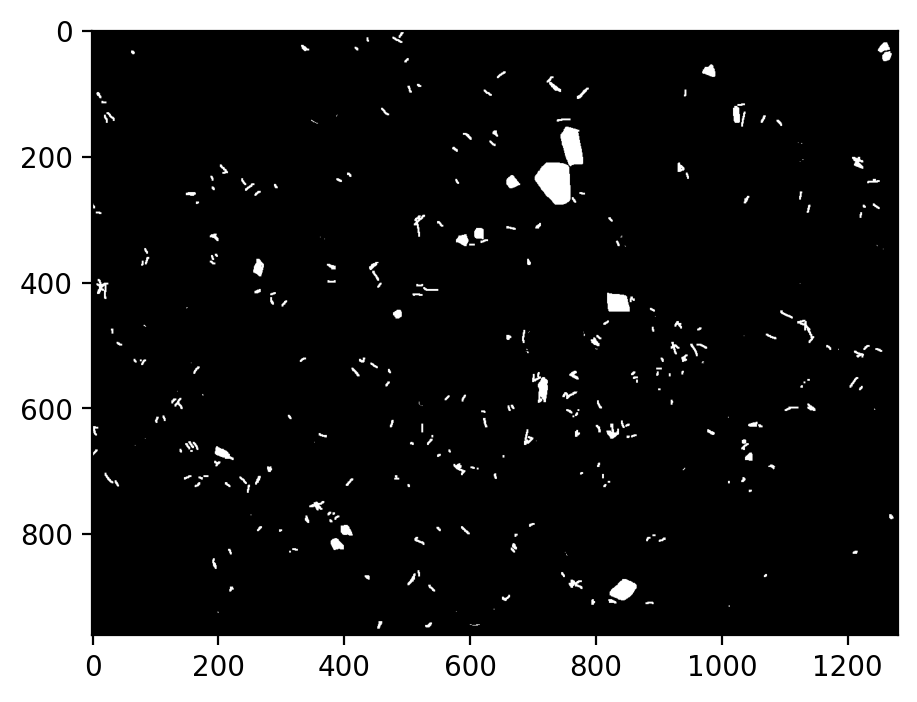

In [90]:
plt.figure(dpi=100)
plt.imshow(image_grains,cmap='gray')
plt.show()

**(3)**

In [91]:
from skimage import measure

In [92]:
labels_bubbles = measure.label(image_bubbles)
labels_grains = measure.label(image_grains)

print(np.unique(labels_bubbles))
print(np.unique(labels_grains))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [93]:
props_bubbles = measure.regionprops(labels_bubbles)
props_grains = measure.regionprops(labels_grains)

**(4)**

In [94]:
areas_bubbles=[]
areas_grains=[]
for p in props_bubbles:
    areas_bubbles.append(p.area)
for p in props_grains:
    areas_grains.append(p.area)

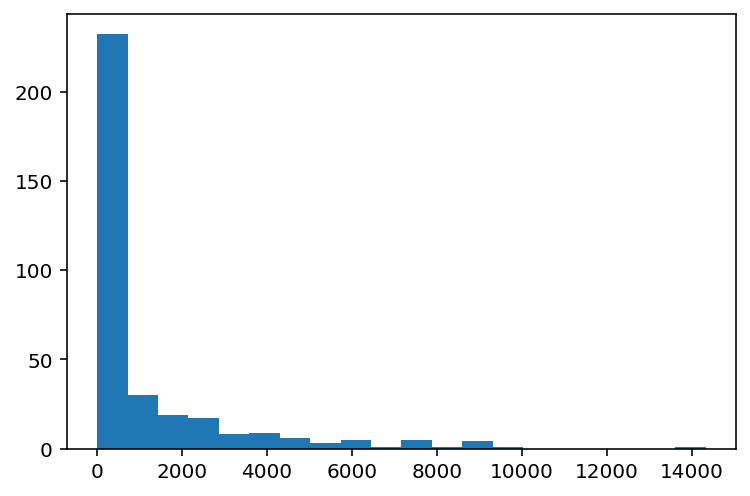

In [95]:
plt.hist(areas_bubbles,20)
plt.show()

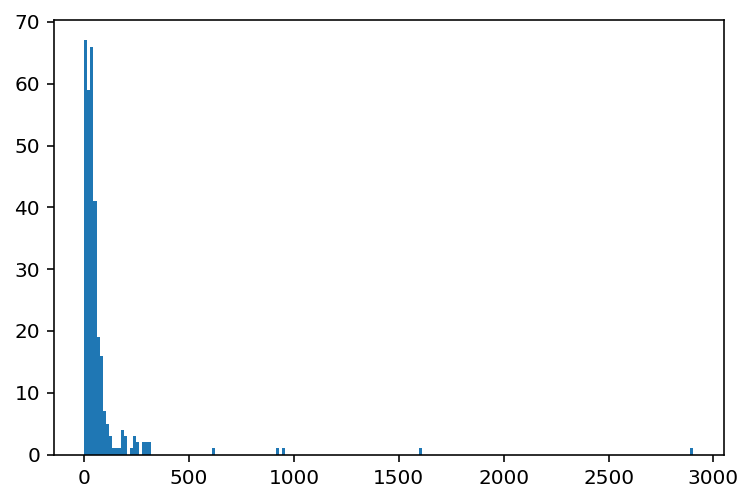

In [96]:
plt.hist(areas_grains,200)
plt.show()

In [97]:
Atot_bubbles = np.sum(areas_bubbles)
Atot_grains = np.sum(areas_grains)
print(Atot_bubbles,Atot_grains)

381750 22516


In [98]:
pixyb,pixxb = image_bubbles.shape
pixyg,pixxg = image_grains.shape

imA_bubbles = pixyb*pixxb
imA_grains = pixyg*pixxg

frac_bubbles = Atot_bubbles/imA_bubbles
frac_grains = Atot_grains/imA_grains

percent_bubbles=frac_bubbles*100
percent_grains=frac_grains*100

print('Percentage of image area covered by bubbles:',percent_bubbles,'%')
print('Percentage of image area covered by grains:',percent_grains,'%')

Percentage of image area covered by bubbles: 31.06689453125 %
Percentage of image area covered by grains: 1.8323567708333333 %


# Part 3

**(1)**

In [26]:
from image_manipulation import prepare_landsat_image
from PIL import Image 
from image_manipulation import bar_plot_with_colors 
from skimage import img_as_ubyte, img_as_uint, img_as_float64 


In [27]:
bands = [6,5,2]  
 
ls_false = prepare_landsat_image(bands)

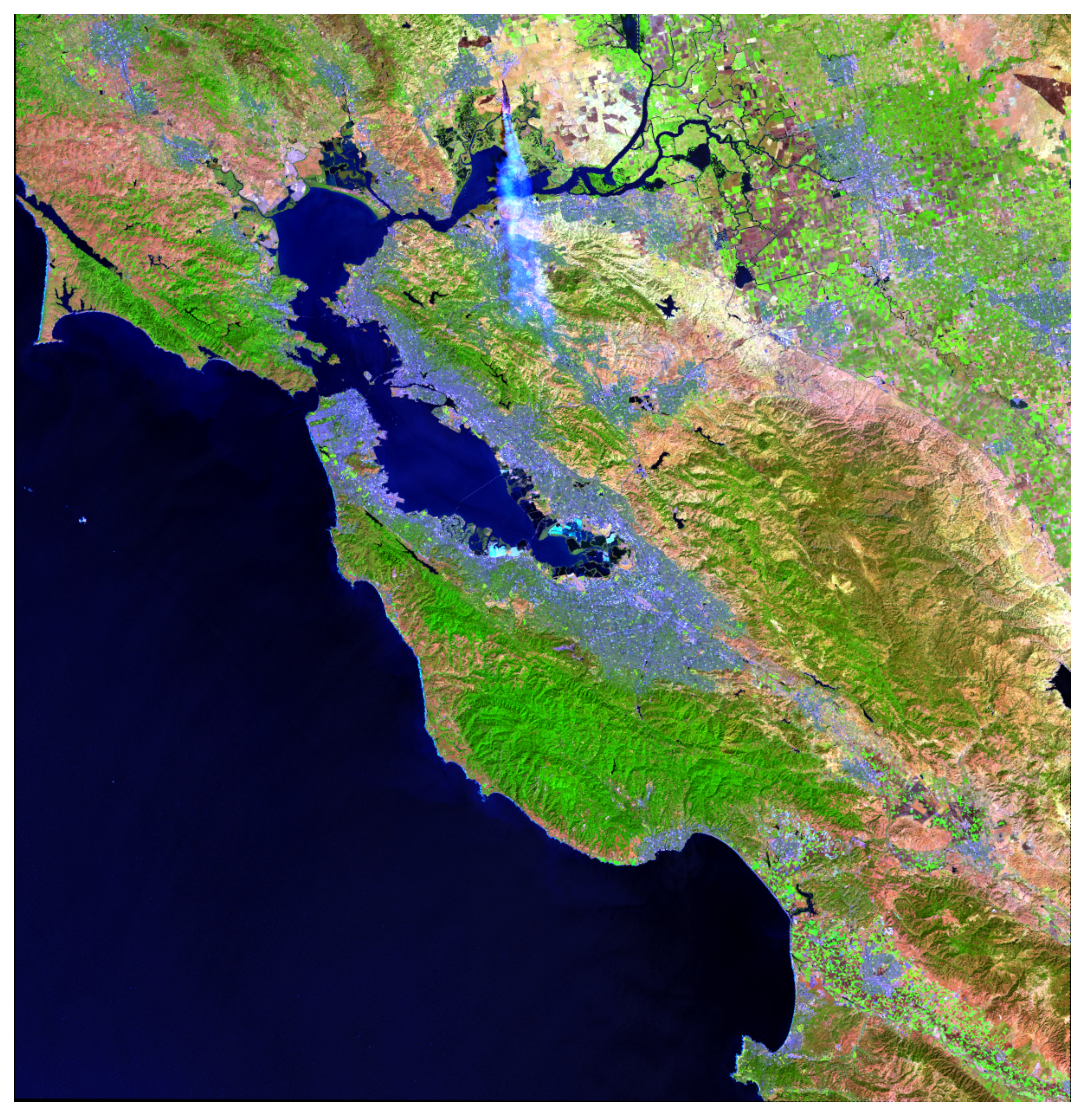

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
plt.axis('off') 
plt.imshow(ls_false) 
plt.show()

**(2)**

In [29]:
imageRGB = Image.fromarray(img_as_ubyte(ls_false)) 
N=7
imageIndexed = imageRGB.quantize(colors=N, kmeans=1)

In [30]:
rgbFromIndexed = imageIndexed.convert("RGB")

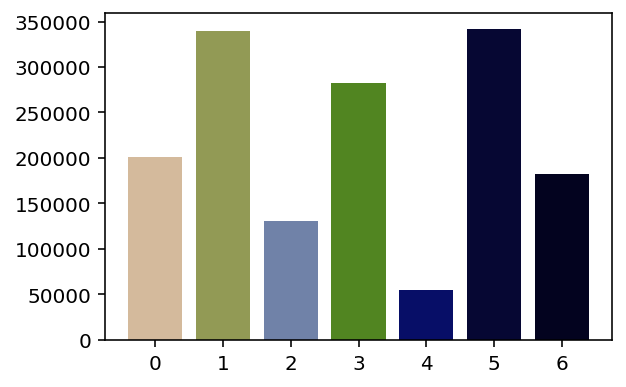

In [31]:
getcolors = imageIndexed.getcolors()
getcolors2 = rgbFromIndexed.getcolors()
counts=[]
labels=[]
palettes=[]
for i in range(len(getcolors)):
    count,label = getcolors[i]
    counts.append(count)
    labels.append(label)
    for i in range(len(getcolors2)):
        count2,palette = getcolors2[i]
        if count2==count:
            palettes.append(palette)
            
bar_plot_with_colors(counts,palettes,labels)

ocean: Dark blue (4), darker blue (5), black (6)

urban: blueish gray (2)

forests: olive (1), green (3)

**(3)**

In [32]:
pixy,pixx = ls_false[:,:,0].shape
imA_total = pixy*pixx

In [33]:
pixels_land = counts[0]+counts[1]+counts[2]+counts[3]
pixels_ocean = counts[4]+counts[5]+counts[6]

In [34]:
frac_land = pixels_land/imA_total
percent_land = frac_land*100

frac_ocean = pixels_ocean/imA_total
percent_ocean = frac_ocean*100

In [35]:
print('Percentage of image covered by land:',percent_land,'%')
print('Percentage of image covered by ocean:',percent_ocean,'%')

Percentage of image covered by land: 62.221435390225196 %
Percentage of image covered by ocean: 37.778564609774804 %


In [36]:
pixels_urban=counts[2]
frac_urban=pixels_urban/pixels_land
percent_urban=frac_urban*100
print('Percentage of land covered by urban area:',percent_urban,'%')

Percentage of land covered by urban area: 13.728590995930679 %


**(4)**

In [37]:
labeled_image = np.array(imageIndexed) 
bw_urban = (labeled_image == 2)

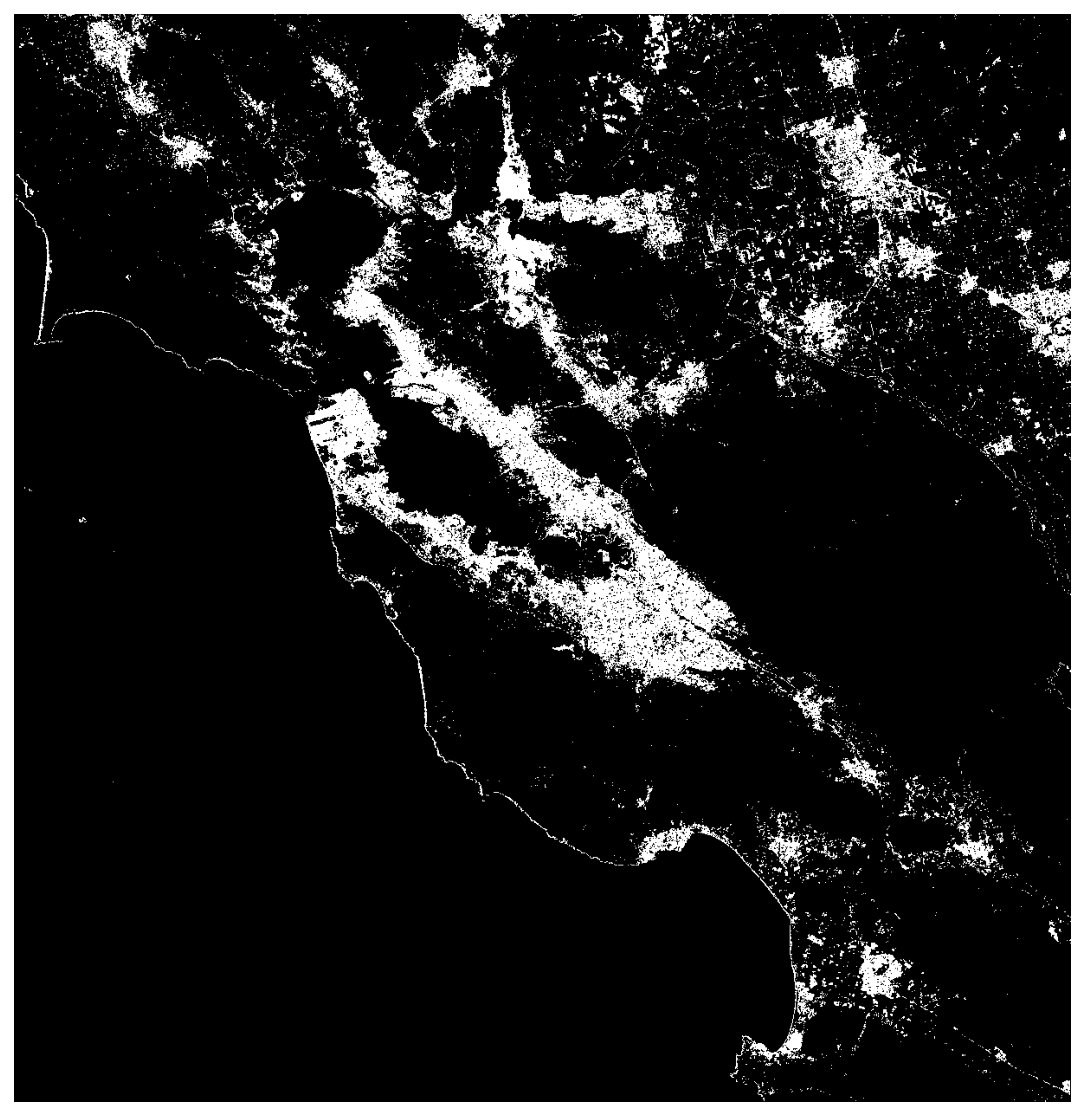

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) 
plt.axis('off') 
plt.imshow(bw_urban,cmap='gray') 
plt.show()

**(5)**



It appears the urban part of the image is including the smoke from the fire in the image, which is the cause of the bright streak in the north